# dbscan

3


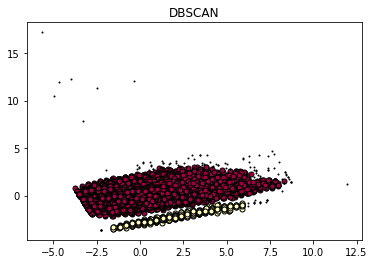

In [23]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy
import sklearn

# Normalizador de información mutua
from sklearn.metrics import normalized_mutual_info_score as NMI
# Normalizador
from sklearn.preprocessing import StandardScaler as SS
# Dimensionador
from sklearn.decomposition import PCA 
# Gestionador HAC 
from sklearn.cluster import DBSCAN
# metrica comparaciones
from sklearn.metrics import normalized_mutual_info_score as nmis

# Parametros
CSV_PATH = 'datos_prueba/prueba40.000.csv'
EPS = 0.5
MIN_PTS=15

# Se obtienen los datos del archivo
dataset = pd.read_csv(CSV_PATH)

# Se filtra el dataset por valores numéricos sin contar brewery_time
data = pd.DataFrame({
                        'review_aroma':      dataset['review_aroma'],
                        'review_appearance': dataset['review_appearance'],
                        'review_palate':     dataset['review_palate'],
                        'review_taste':      dataset['review_taste'],
                        'beer_abv':          dataset['beer_abv']})
breweryid = pd.DataFrame({'brewery_id': dataset['brewery_id']})
# Se arregla el dataset asumiendo 0 == vacio - Error: NaN found
data = data.fillna(0)

# Se normalizan los datos y se disminuye la dimención
data = SS().fit_transform(data)
data = PCA(n_components = 2).fit_transform(data)




db = DBSCAN(eps=EPS, min_samples=MIN_PTS).fit(data)
core_samples_mask = np.zeros_like(db.labels_, dtype = bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
unique_labels = set(labels)
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))
print len (unique_labels)
for k, col in zip(unique_labels, colors):
	if k == -1:
		col = 'k'

	class_member_mask = (labels == k)

	xy = data[class_member_mask & core_samples_mask]
	plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col, markeredgecolor='k', markersize=5)
	xy = data[class_member_mask & ~core_samples_mask]
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col, markeredgecolor='k', markersize=1)

plt.title("DBSCAN")
plt.show()



### analisis

Se toma como muestra solo los primeros 40.000 datos, debido a que con todos los datos no se tiene una respuesta por problemas de hardware, HAC al ser un algortimo aglomerativo, obtiene un solo cluster con valores de EPS y de min ponints,  ajustados con valores de 0.5 y de 15 respectivamnete, se provo con otros valores, pero siempre se obtubieron valores semejantes, donde solo se destaca un gran cluster, y otros puntos noise points que representan mas que nada outliers, se puede justificar tambien la existencia de solo un cluster por el echo de usar  todas las dimensiones disponibles, ello podira traer por consecuente que por alta dimensionalidad los puntos tienden a juntarse al usar distancia euclidiana, por ello se descartar el atributo 'review_overall', que podria ser redundante por el resto de los atributos, y con ello se obtuvieron 2 cluster lo cual visualmente se ve correcto y se usaron los mismo valores EPS y MIN POINTS, si modificamos el valor de EPS a 0.3 tendriamos 19 clusters, pero graficamente no se aprecia que estos clusters sean represntativos, por lo que el valor de EPS se dejo como 0.5.